<a href="https://colab.research.google.com/github/GUC-DM/w25-mini-project-1-george-samy-t05-yassin-ahmed-t05/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


 import data by this code and to verify that the data loaded correctly, df.head() displays the first five rows and to check data.



## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [132]:
print(df.shape)

(1100, 11)


Prints the shape of the dataset which shows how many rows and columns and non null values and their number and data types

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


Prints the whole structure of the dataframe and also helps identify which columns are numeric and categorical and where missing data do exists

In [134]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


In [135]:
df.isna().sum().sort_values(ascending=False)

,0
Governorate,227
Building_Type,110
Average_Temperature,110
Building_ID,0
Neighborhood,0
Occupancy_Level,0
Day_of_Week,0
Appliances_Usage_Level,0
SquareFootage,0
Last_Maintenance_Date,0


calculates the number of missing values for every column in the DataFrame and orders them in descending order

In [136]:
print(df.duplicated().sum())

0


checks for duplicated rows

In [137]:
print(df.duplicated(subset=["Building_ID"]).sum())

0


checks for duplicated values specailly in building id column

In [138]:
df.describe()

,Average_Temperature
count,990.000000
mean,33.499404
std,10.703806
min,-4.910000
25%,29.422500
50%,35.260000
75%,39.970000
max,50.000000



 the output shows statistics for Average Temperature

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [139]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


In [140]:
df["SquareFootage"]=df["SquareFootage"].astype(str).str.replace("m2","",case=False)
df["Energy_Consumption"]=df["Energy_Consumption"].astype(str).str.replace("kWh","",case=False)

cleans the data in the columns by converting them to string type and removing the units m2 and kwh

In [141]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063,2020-01-01,28.61,2713.95
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372,2022-02-24,NaN,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17


In [142]:
df["Day_of_Week"]=df["Day_of_Week"].str.capitalize()
df["Appliances_Usage_Level"]=df["Appliances_Usage_Level"].str.capitalize()
df["Occupancy_Level"]=df["Occupancy_Level"].str.capitalize()
df["Building_Type"]=df["Building_Type"].str.capitalize()
df["Governorate"]=df["Governorate"].str.capitalize()
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063,2020-01-01,28.61,2713.95
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,Tuesday,High,High,44372,2022-02-24,NaN,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.88,4101.24
3,BLD-1003-HE,NaN,NaN,+92Dokki,Tuesday,Low,High,13265,2023-07-30,35.06,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17


captlize the first letter and lower cast the other letters to make data consistent

In [143]:
df["SquareFootage"] = pd.to_numeric(df["SquareFootage"])
df["Energy_Consumption"] = pd.to_numeric(df["Energy_Consumption"])
df["Energy_Consumption"].dtype
df["Average_Temperature"].dtype
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063,2020-01-01,28.61,2713.95
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,Tuesday,High,High,44372,2022-02-24,NaN,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.88,4101.24
3,BLD-1003-HE,NaN,NaN,+92Dokki,Tuesday,Low,High,13265,2023-07-30,35.06,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17


changes the cleaned columns into a numeric data type then makes sure the they have changed

In [144]:
df["Last_Maintenance_Date"] = pd.to_datetime(df["Last_Maintenance_Date"])
df["Last_Maintenance_Date"].dtype

dtype('<M8[ns]')

switches the 'Last_Maintenance_Date' column to the datetime data type and check it

In [145]:
df.isna().sum().sort_values(ascending=False)

,0
Governorate,227
Building_Type,110
Average_Temperature,110
Building_ID,0
Neighborhood,0
Occupancy_Level,0
Day_of_Week,0
Appliances_Usage_Level,0
SquareFootage,0
Last_Maintenance_Date,0


In [146]:
df["Average_Temperature"] = df["Average_Temperature"].fillna(df["Average_Temperature"].mean())
df["Governorate"] = df["Governorate"].fillna(df["Governorate"].mode()[0])
df["Building_Type"] = df["Building_Type"].fillna(df["Building_Type"].mode()[0])
df.isna().sum().sort_values(ascending=False)

,0
Building_ID,0
Building_Type,0
Governorate,0
Neighborhood,0
Day_of_Week,0
Occupancy_Level,0
Appliances_Usage_Level,0
SquareFootage,0
Last_Maintenance_Date,0
Average_Temperature,0


fill the avg temp with the mean and governorate and building type with the mode
and check again for null values

In [147]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063,2020-01-01,28.610000,2713.95
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,Tuesday,High,High,44372,2022-02-24,33.499404,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.880000,4101.24
3,BLD-1003-HE,Residential,Alexandria,+92Dokki,Tuesday,Low,High,13265,2023-07-30,35.060000,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.820000,3279.17


In [148]:
level_mapping = {'Low': 1,'Medium': 2,'High': 3}
df['Occupancy_Level'] = df['Occupancy_Level'].map(level_mapping)
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,3,Low,7063,2020-01-01,28.610000,2713.95
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,Tuesday,3,High,44372,2022-02-24,33.499404,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,2,Low,19255,2021-02-22,37.880000,4101.24
3,BLD-1003-HE,Residential,Alexandria,+92Dokki,Tuesday,1,High,13265,2023-07-30,35.060000,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,1,Low,13375,2022-08-12,28.820000,3279.17


convert levels to numbers to help the model learn better

In [149]:
level_mapping2 = {'Low': 1,'Medium': 2,'High': 3}
df['Appliances_Usage_Level'] = df['Appliances_Usage_Level'].map(level_mapping2)
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,3,1,7063,2020-01-01,28.610000,2713.95
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,Tuesday,3,3,44372,2022-02-24,33.499404,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,2,1,19255,2021-02-22,37.880000,4101.24
3,BLD-1003-HE,Residential,Alexandria,+92Dokki,Tuesday,1,3,13265,2023-07-30,35.060000,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,1,1,13375,2022-08-12,28.820000,3279.17


convert levels to numbers to help the model learn better

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Building_ID             1100 non-null   object        
 1   Building_Type           1100 non-null   object        
 2   Governorate             1100 non-null   object        
 3   Neighborhood            1100 non-null   object        
 4   Day_of_Week             1100 non-null   object        
 5   Occupancy_Level         1100 non-null   int64         
 6   Appliances_Usage_Level  1100 non-null   int64         
 7   SquareFootage           1100 non-null   int64         
 8   Last_Maintenance_Date   1100 non-null   datetime64[ns]
 9   Average_Temperature     1100 non-null   float64       
 10  Energy_Consumption      1100 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 94.7+ KB


In [151]:
day_map = {"Monday": 1,"Tuesday": 2,"Wednesday": 3,"Thursday": 4,"Friday": 5,"Saturday": 6,"Sunday": 7}
df["Day_of_Week"] = df["Day_of_Week"].map(day_map)
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,3,3,1,7063,2020-01-01,28.610000,2713.95
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,2,3,3,44372,2022-02-24,33.499404,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,7,2,1,19255,2021-02-22,37.880000,4101.24
3,BLD-1003-HE,Residential,Alexandria,+92Dokki,2,1,3,13265,2023-07-30,35.060000,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,1,1,1,13375,2022-08-12,28.820000,3279.17


custom mapping to the 'Day_of_Week' column converting the day names into numerical expressions

In [152]:
df["Day_Type"] = df["Day_of_Week"].apply(lambda x: "weekend" if x in [6, 7] else "weekday")
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_Type
0,BLD-1000-UD,Residential,Alexandria,Smouha,3,3,1,7063,2020-01-01,28.610000,2713.95,weekday
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,2,3,3,44372,2022-02-24,33.499404,5744.99,weekday
2,BLD-1002-IH,Industrial,Cairo,New Cairo,7,2,1,19255,2021-02-22,37.880000,4101.24,weekend
3,BLD-1003-HE,Residential,Alexandria,+92Dokki,2,1,3,13265,2023-07-30,35.060000,3009.14,weekday
4,BLD-1004-XD,Commercial,Alexandria,Smouha,1,1,1,13375,2022-08-12,28.820000,3279.17,weekday


classifying day numbers 6 and 7 (Saturday and Sunday) as "weekend" and add new column

In [153]:
df["Building_ID"] = df["Building_ID"].str.replace('[^0-9]', '', regex=True)
df["Neighborhood"] = df["Neighborhood"].str.replace('[^A-Za-z]', '', regex=True)
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_Type
0,1000,Residential,Alexandria,Smouha,3,3,1,7063,2020-01-01,28.610000,2713.95,weekday
1,1001,Commercial,Giza,Mohandessin,2,3,3,44372,2022-02-24,33.499404,5744.99,weekday
2,1002,Industrial,Cairo,NewCairo,7,2,1,19255,2021-02-22,37.880000,4101.24,weekend
3,1003,Residential,Alexandria,Dokki,2,1,3,13265,2023-07-30,35.060000,3009.14,weekday
4,1004,Commercial,Alexandria,Smouha,1,1,1,13375,2022-08-12,28.820000,3279.17,weekday


clean building id to make it only numbers and clean neighborhood to make it only letters

In [154]:
df["Neighborhood"]=df["Neighborhood"].str.capitalize()
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_Type
0,1000,Residential,Alexandria,Smouha,3,3,1,7063,2020-01-01,28.610000,2713.95,weekday
1,1001,Commercial,Giza,Mohandessin,2,3,3,44372,2022-02-24,33.499404,5744.99,weekday
2,1002,Industrial,Cairo,Newcairo,7,2,1,19255,2021-02-22,37.880000,4101.24,weekend
3,1003,Residential,Alexandria,Dokki,2,1,3,13265,2023-07-30,35.060000,3009.14,weekday
4,1004,Commercial,Alexandria,Smouha,1,1,1,13375,2022-08-12,28.820000,3279.17,weekday


make the letters consistant by captlizing the first and lowerring the rest

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Building_ID             1100 non-null   object        
 1   Building_Type           1100 non-null   object        
 2   Governorate             1100 non-null   object        
 3   Neighborhood            1100 non-null   object        
 4   Day_of_Week             1100 non-null   int64         
 5   Occupancy_Level         1100 non-null   int64         
 6   Appliances_Usage_Level  1100 non-null   int64         
 7   SquareFootage           1100 non-null   int64         
 8   Last_Maintenance_Date   1100 non-null   datetime64[ns]
 9   Average_Temperature     1100 non-null   float64       
 10  Energy_Consumption      1100 non-null   float64       
 11  Day_Type                1100 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), obje

In [156]:
df["Building_ID"] = pd.to_numeric(df["Building_ID"])
df["Days_Since_Maintenance"] = (df["Last_Maintenance_Date"].max() - df["Last_Maintenance_Date"]).dt.days

converts id to a numeric type and  creates a new feature 'Days_Since_Maintenance' by calculating the difference in days between the latest maintenance date in the dataset and each buildings 'Last_Maintenance_Date'

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Building_ID             1100 non-null   int64         
 1   Building_Type           1100 non-null   object        
 2   Governorate             1100 non-null   object        
 3   Neighborhood            1100 non-null   object        
 4   Day_of_Week             1100 non-null   int64         
 5   Occupancy_Level         1100 non-null   int64         
 6   Appliances_Usage_Level  1100 non-null   int64         
 7   SquareFootage           1100 non-null   int64         
 8   Last_Maintenance_Date   1100 non-null   datetime64[ns]
 9   Average_Temperature     1100 non-null   float64       
 10  Energy_Consumption      1100 non-null   float64       
 11  Day_Type                1100 non-null   object        
 12  Days_Since_Maintenance  1100 non-null   int64   

In [158]:
df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,Day_Type,Days_Since_Maintenance
0,1000,Residential,Alexandria,Smouha,3,3,1,7063,2020-01-01,28.610000,2713.95,weekday,1826
1,1001,Commercial,Giza,Mohandessin,2,3,3,44372,2022-02-24,33.499404,5744.99,weekday,1041
2,1002,Industrial,Cairo,Newcairo,7,2,1,19255,2021-02-22,37.880000,4101.24,weekend,1408
3,1003,Residential,Alexandria,Dokki,2,1,3,13265,2023-07-30,35.060000,3009.14,weekday,520
4,1004,Commercial,Alexandria,Smouha,1,1,1,13375,2022-08-12,28.820000,3279.17,weekday,872


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

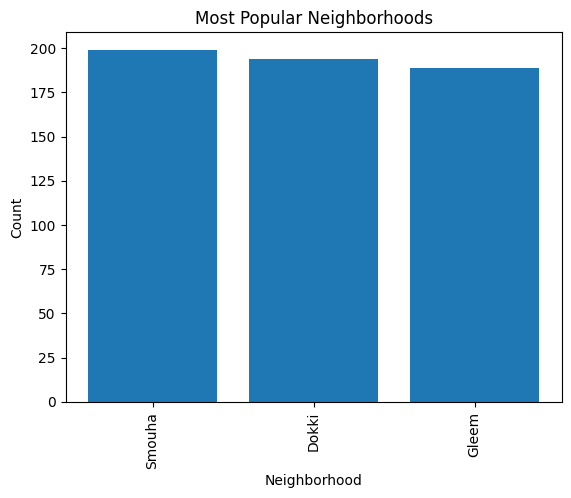

Top 3 neighborhoods:
Smouha: 199
Dokki: 194
Gleem: 189


In [159]:
counts = df["Neighborhood"].value_counts().head(3)
plt.bar(counts.index, counts.values)
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.title("Most Popular Neighborhoods")
plt.xticks(rotation=90)
plt.show()
top3 = counts.head(3)
print("Top 3 neighborhoods:")
for i, (name, cnt) in enumerate(top3.items()):
    print(f"{name}: {cnt}")

This code calculates the top 3 most popular neighborhoods based on the frequency of entries then visualizes this count using a bar plot

the top three neighborhoods are Smouha, Dokki and Giza

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

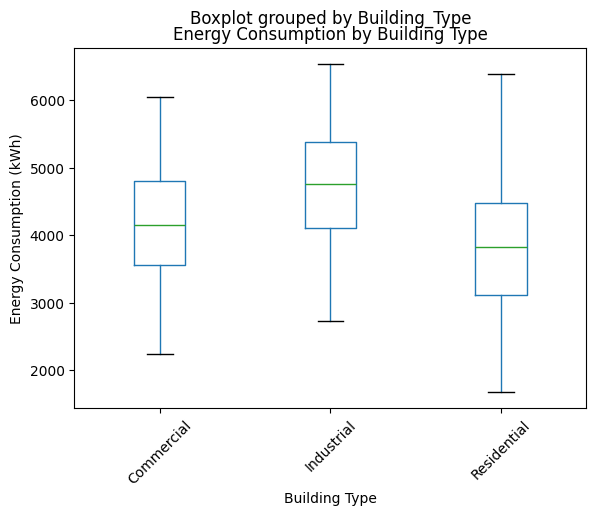

Widest distribution: Residential
Highest average: Industrial


In [160]:
df.boxplot(column="Energy_Consumption", by="Building_Type", grid=False)
plt.title("Energy Consumption by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Energy Consumption (kWh)")
plt.xticks(rotation=45)
plt.show()

spread = df.groupby("Building_Type")["Energy_Consumption"].apply(lambda x: x.max() - x.min())
average = df.groupby("Building_Type")["Energy_Consumption"].mean()
print("Widest distribution:", spread.idxmax())
print("Highest average:", average.idxmax())


This code visuals the distribution of 'Energy_Consumption' through different 'Building_Type's using a box plot

widest diistrbution is resdential and highest avg is the industrial

**Q3:** How does the building size affect energy consumption?

**Visualization**

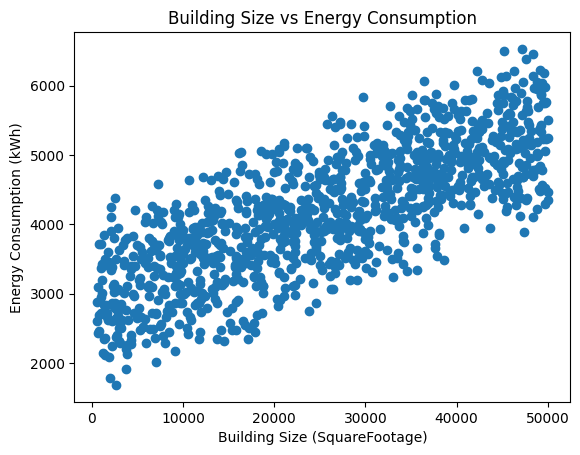

Correlation=
0.7707645406507827


In [161]:

plt.scatter(df["SquareFootage"], df["Energy_Consumption"])

plt.xlabel("Building Size (SquareFootage)")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Building Size vs Energy Consumption")

plt.show()

print("Correlation=")
print(df["SquareFootage"].corr(df["Energy_Consumption"]))


This code generates a scatter plot to visualize the relationship between building size and 'Energy_Consumption' and calculates their correlation

the scatter plot shows positive relation value 0.77 indicates a strong positive relationship between building size and energy consumption. when one increase the other increase by 77 percent

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

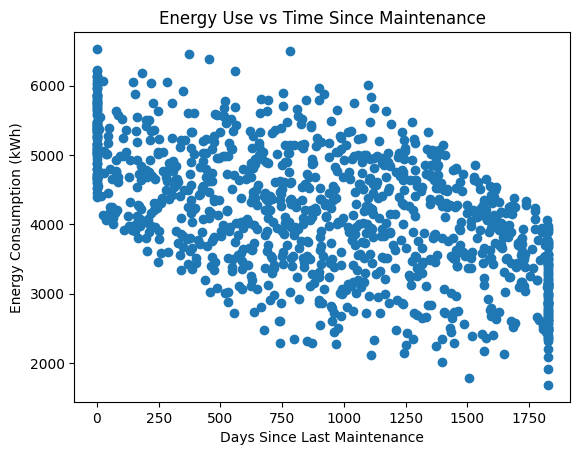

Correlation between Days_Since_Maintenance and Energy_Consumption=
-0.5514041436111478


In [162]:
plt.scatter(df["Days_Since_Maintenance"], df["Energy_Consumption"])
plt.xlabel("Days Since Last Maintenance")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Use vs Time Since Maintenance")
plt.show()
print("Correlation between Days_Since_Maintenance and Energy_Consumption=")
print(df["Days_Since_Maintenance"].corr(df["Energy_Consumption"]))

this code generates scatter plot to visualize the relationship between 'Days_Since_Maintenance' and 'Energy_Consumption'

The scatter plot shows a negative trend and the correlation value −0.55 when one increase the other decrease with 55 percent

**Q5:** Are all the numerical variables normally distributed, or is there any

---

skewness?

**Visualization**

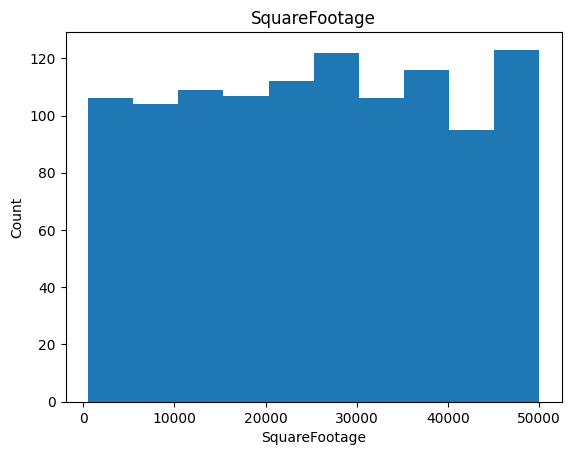

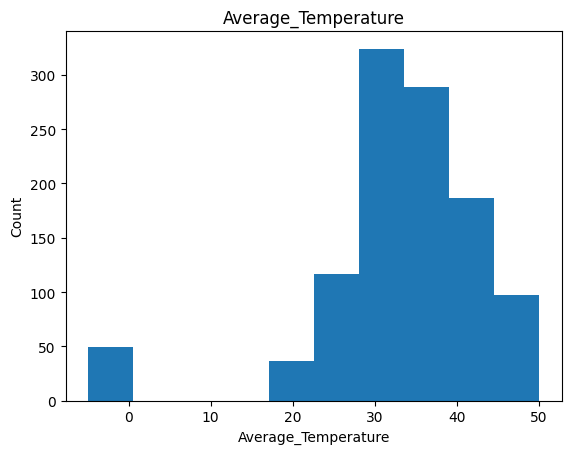

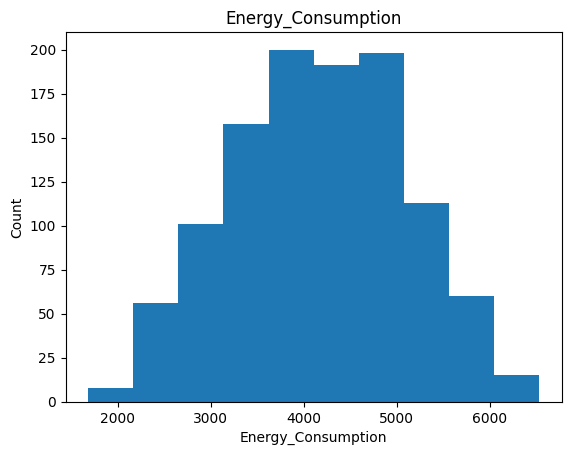

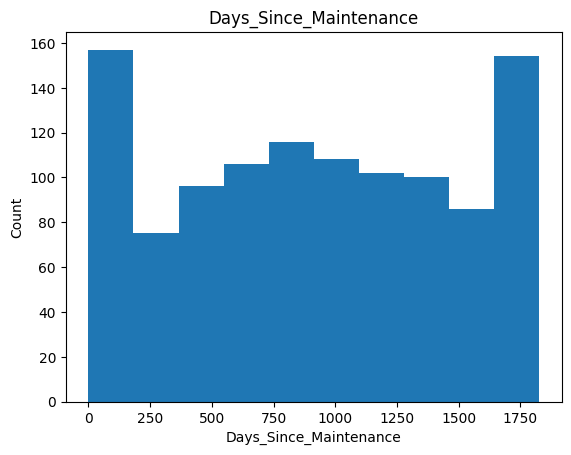

Skewness values:
SquareFootage            -0.009364
Average_Temperature      -1.795635
Energy_Consumption       -0.060156
Days_Since_Maintenance   -0.016633
dtype: float64
note: if x=0 ->not skewed,x>0 -> right skewed, x<0 -> left skewed


In [163]:
import matplotlib.pyplot as plt
num_cols = ["SquareFootage", "Average_Temperature", "Energy_Consumption", "Days_Since_Maintenance"]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


print("Skewness values:")
print(df[num_cols].skew())
print("note: if x=0 ->not skewed,x>0 -> right skewed, x<0 -> left skewed")



this showes if the values is skewwed or properly distrbuted
note: if x=0 ->not skewed,x>0 -> right skewed, x<0 -> left skewed so squrefootage is left skewwed and avg temp is right skewed and energy concumption and days since maintanince are left skewed  

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this




dataset?

**Visualization**

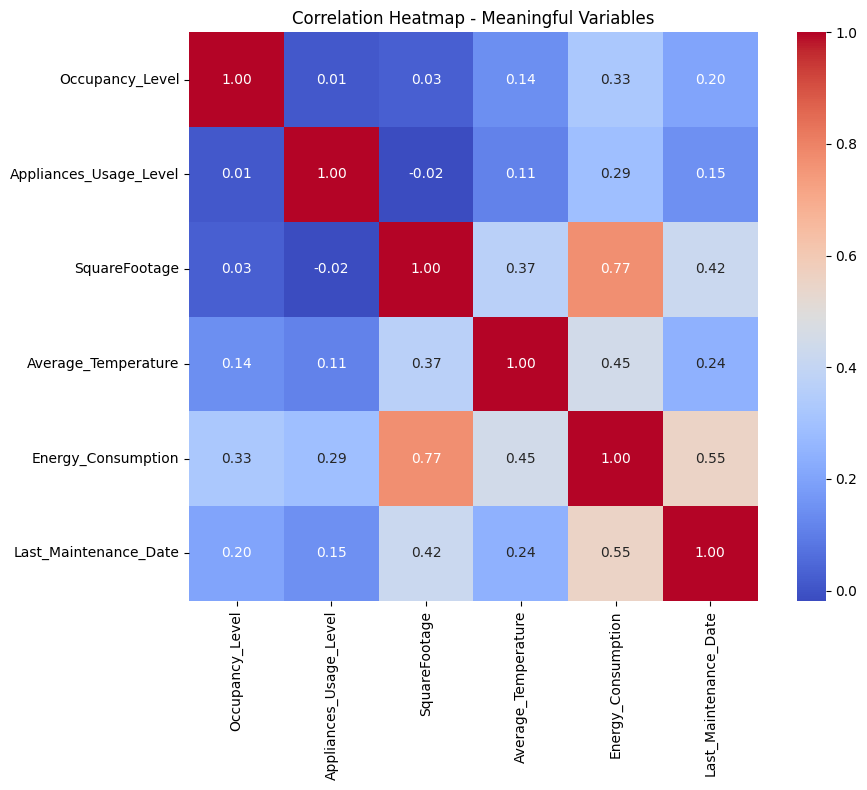

In [164]:

hm_cols = ["Occupancy_Level", "Appliances_Usage_Level", "SquareFootage",
                   "Average_Temperature", "Energy_Consumption", "Last_Maintenance_Date"]

corr = df[hm_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap - Meaningful Variables")
plt.tight_layout()
plt.show()


Multicollinearity occurs when independent variables are highly correlated with each other (correlation= 0.7-0.8), making it difficult for the model to determine each variable's individual effect on the target.
Based on the correlation heatmap, if no pairs show correlation above 0.7-0.8, there's no significant multicollinearity problem.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [165]:

X = df[["SquareFootage", "Average_Temperature", "Occupancy_Level","Appliances_Usage_Level", "Days_Since_Maintenance",
        "Building_Type", "Governorate", "Day_Type"]]

y = df["Energy_Consumption"]


X = pd.get_dummies(X, columns=["Building_Type", "Governorate", "Day_Type"], drop_first=True)
print(X.head())



   SquareFootage  Average_Temperature  Occupancy_Level  \
0           7063            28.610000                3   
1          44372            33.499404                3   
2          19255            37.880000                2   
3          13265            35.060000                1   
4          13375            28.820000                1   

   Appliances_Usage_Level  Days_Since_Maintenance  Building_Type_Industrial  \
0                       1                    1826                     False   
1                       3                    1041                     False   
2                       1                    1408                      True   
3                       3                     520                     False   
4                       1                     872                     False   

   Building_Type_Residential  Governorate_Cairo  Governorate_Giza  \
0                       True              False             False   
1                      False          

initiate x and y columns for the model

In [166]:
X = X.astype(int)
print(X.head())


   SquareFootage  Average_Temperature  Occupancy_Level  \
0           7063                   28                3   
1          44372                   33                3   
2          19255                   37                2   
3          13265                   35                1   
4          13375                   28                1   

   Appliances_Usage_Level  Days_Since_Maintenance  Building_Type_Industrial  \
0                       1                    1826                         0   
1                       3                    1041                         0   
2                       1                    1408                         1   
3                       3                     520                         0   
4                       1                     872                         0   

   Building_Type_Residential  Governorate_Cairo  Governorate_Giza  \
0                          1                  0                 0   
1                          0          

converts boolean values into integers

In [167]:
num_cols = ["SquareFootage", "Average_Temperature",
            "Occupancy_Level", "Appliances_Usage_Level",
            "Days_Since_Maintenance"]

X[num_cols] = (X[num_cols] - X[num_cols].min()) / (X[num_cols].max() - X[num_cols].min())
print(X.head())

   SquareFootage  Average_Temperature  Occupancy_Level  \
0       0.131541             0.592593              1.0   
1       0.886219             0.685185              1.0   
2       0.378158             0.759259              0.5   
3       0.256994             0.722222              0.0   
4       0.259219             0.592593              0.0   

   Appliances_Usage_Level  Days_Since_Maintenance  Building_Type_Industrial  \
0                     0.0                1.000000                         0   
1                     1.0                0.570099                         0   
2                     0.0                0.771084                         1   
3                     1.0                0.284775                         0   
4                     0.0                0.477547                         0   

   Building_Type_Residential  Governorate_Cairo  Governorate_Giza  \
0                          1                  0                 0   
1                          0          

normlize the data

## Modelling

_Apply the linear regression model below._

In [168]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23
)

this code splits the data into training and testing

In [169]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

apply the model

In [170]:
parameter = ['theta_0'] + [f'theta_{i+1}' for i in range(X.shape[1])]
columns   = ['y-intercept'] + list(X.columns)
sk_theta  = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({
    'parameter': parameter,
    'column': columns,
    'theta_value': sk_theta
})
parameter_df


,parameter,column,theta_value
0,theta_0,y-intercept,2395.021771
1,theta_1,SquareFootage,2368.292241
2,theta_2,Average_Temperature,104.548191
3,theta_3,Occupancy_Level,633.609893
4,theta_4,Appliances_Usage_Level,631.696009
5,theta_5,Days_Since_Maintenance,-142.692907
6,theta_6,Building_Type_Industrial,468.819711
7,theta_7,Building_Type_Residential,-381.489651
8,theta_8,Governorate_Cairo,-0.217294
9,theta_9,Governorate_Giza,-15.678558


loop to display all coff the model generted and put it in df

In [171]:
y_pred = lin_reg.predict(x_test)

model training on the 20 percent we set above

## Model Evaluation

Evaluate the model you applied.

In [172]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, median_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 231.24356077076217
R² Score: 0.939940900242157


evaluate the model by calc r squared and rsme to see accuracy and errors

**Bouns Part**

In [173]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, median_absolute_error, mean_absolute_error

Q1 = np.percentile(y_train, 25)
Q3 = np.percentile(y_train, 75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

bouns = (y_train >= low) & (y_train <= high)
x_train_filtered = x_train[bouns]
y_train_filtered = y_train[bouns]


lin_reg_filtered = LinearRegression()
lin_reg_filtered.fit(x_train_filtered, y_train_filtered)

y_pred_filtered = lin_reg_filtered.predict(x_test)

mse_filtered = mean_squared_error(y_test, y_pred_filtered)
rmse_filtered = np.sqrt(mse_filtered)
r2_filtered = r2_score(y_test, y_pred_filtered)

print("\n After Removing Outliers")
print("R² Score:", r2_filtered)
print("RMSE:", rmse_filtered)



 After Removing Outliers
R² Score: 0.939940900242157
RMSE: 231.24356077076217


remove the outliers but the numbers are the same this means data  has no outliers

## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.

the linear regression model was very good at predicting how much energy buildings use it got an r2 of 094 which means it can explain about 94 percent of the changes in energy use based on things like building size temperature occupancy and maintenance history the rmse means the average error is small compared to the total energy range this shows the predictions are correct and steady the results show that bigger buildings use more energy more people and more appliance use also make energy higher and when the temperature goes up the energy use goes up too because of cooling the data showed a small negative link between maintenance and energy use which might be because of seasons not real maintenance overall the model is strong and good for predicting energy use for more trust you can test it again with ridge or lasso models this model is good for electricity companies because it gives correct results and shows what things affect energy use
